Below you will find The exploratory analysis performed on the chosen format of attack on a network (botnet, DDos, etc...) from the dataset as different types of attacks that were recorded over different days of february and march of 2018 at the university of New Brunswick.

The CSV file used in this note is "02-14-2018", due to it being the most balanced day of benigh to malicious packets of all the days recorded.

# Data setup

In [ ]:
# Library Imports
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse
from datetime import datetime
import os

# EDA Setup
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# ML Model Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# NN Model Imports
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input
from keras.layers import Flatten
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.layers import Dropout

# Metric Imports
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Other
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CSVs/02-14-2018.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA)

### General Data Inspection

In [ ]:
# Shape Inspection
print('Number of Rows (Samples): %s' % str((df.shape[0])))
print('Number of Columns (Features): %s' % str((df.shape[1])))

Number of Rows (Samples): 1048575
Number of Columns (Features): 80


In [ ]:
# Head Inspection
df.head(4)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
# check the columns in data
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [ ]:
# Inspecting Types of Labels
label_counts = df['Label'].value_counts()
print(label_counts)

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64


### Univarient Analysis

<Axes: xlabel='Label', ylabel='Count'>

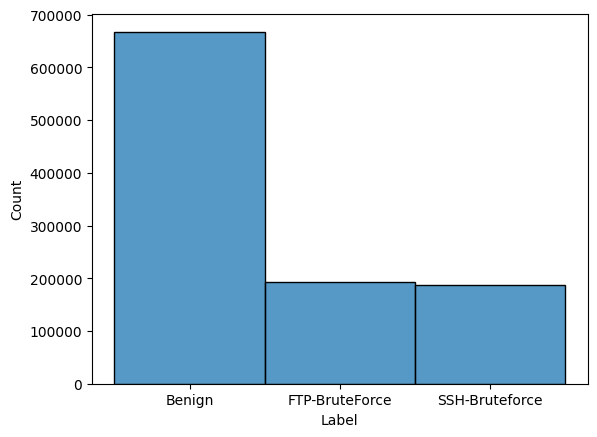

In [ ]:
sns.histplot(data=df, x="Label")

<Axes: xlabel='Pkt Size Avg'>

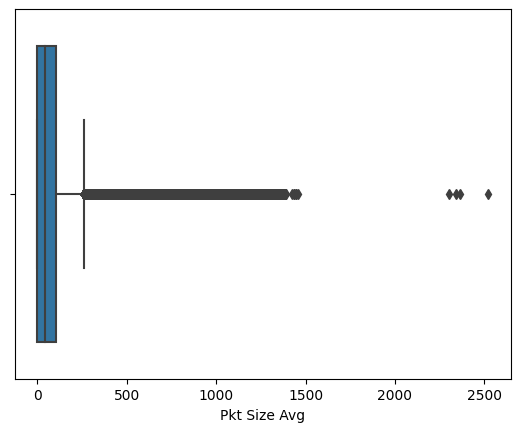

In [ ]:
sns.boxplot(data=df, x="Pkt Size Avg")

### Multivarient Analysis

CPU times: user 1.24 s, sys: 134 ms, total: 1.38 s
Wall time: 1.34 s


<Axes: xlabel='Bwd Pkts/s', ylabel='Fwd Seg Size Min'>

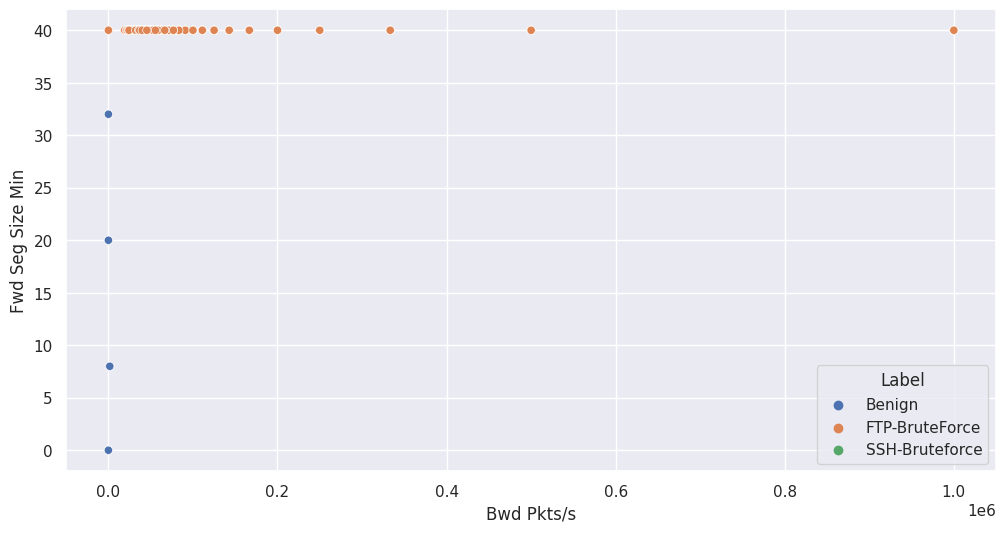

In [ ]:
%%time
sns.set(rc={'figure.figsize':(12, 6)})
sns.scatterplot(x=df['Bwd Pkts/s'][:50000], y=df['Fwd Seg Size Min'][:50000],
                hue='Label', data=df)



From the graphs, we came to know that:

* Most of the attacks made by intruders are malignant (almost 700k)
    
* FTP-BruteFore and SSH-BruteForce type attacks are less in numbers (less than 200k)
    
* Most of the intruders try to make a malignant attack on network systems



# Data Pre-Processing (Used by All Models)

### Checking for Missing Value

Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data.

In [ ]:
# check for some null or missing values in our dataset
df.isna().sum().to_numpy()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2277,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])



All features in the data have no null or missing values, except one feature that contains 2277 missing values. We need to remove this column from our data, so that our data may get cleaned

In [ ]:
# drop null or missing columns
cleaned_data = df.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

After removing the missing valued column in our data, we have now no feature that contains any missing or null value. Data is cleaned now.

### Label Encoding

The Label feature in the data contains 3 labels as Benign, BruteForceFTP and BruteForceSSH. All these are in string format. For our neural network, we need to convert them into numbers so that our NN may understand their representations.

In [ ]:
# encode the column labels
label_encoder = LabelEncoder()
cleaned_data['Label']= label_encoder.fit_transform(cleaned_data['Label'])
cleaned_data['Label'].unique()

<ipython-input-37-c0bdb82b1f12>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1, 2])

In [ ]:
# check for encoded labels
cleaned_data['Label'].value_counts()

0    665355
1    193354
2    187589
Name: Label, dtype: int64

## Shaping Data for Other Models

In [ ]:
cleaned_data.shape

(1046298, 80)

In [ ]:
other_df = cleaned_data.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(other_df.drop('Label', axis=1), other_df['Label'], test_size=0.2, random_state=42)

## Shaping Data For CNN (1 Dimensional)

For applying a convolutional neural network on our data, we will have to follow these steps:

* Seperate the data of each of the labels
    
* Create a numerical matrix representation of labels

* Apply resampling on data so that can make the distribution equal for all labels
    
* Create X (predictor) and Y (target) variables

* Split the data into train and test sets

* Make data multi-dimensional for CNN

* Apply CNN on data


In [ ]:
# make 3 seperate datasets for 3 feature labels
data_1 = cleaned_data[cleaned_data['Label'] == 0]
data_2 = cleaned_data[cleaned_data['Label'] == 1]
data_3 = cleaned_data[cleaned_data['Label'] == 2]

# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make bruteforce feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make bruteforceSSH feature
y_3 = np.full(data_3.shape[0], 2)
y_ssh = pd.DataFrame(y_3)

# merging the original dataframe
X = pd.concat([data_1, data_2, data_3], sort=True)
y = pd.concat([y_benign, y_bf, y_ssh], sort=True)

In [ ]:
y_1, y_2, y_3

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [ ]:
print(X.shape)
print(y.shape)

(1046298, 80)
(1046298, 1)


In [ ]:
# checking if there are some null values in data
X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

### Data Argumentation

\

In [ ]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=20000,
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000,
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000,
                           random_state=123, replace=True)

In [ ]:
train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample])
train_dataset.head(2)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
659775,53,17,14/02/2018 03:29:35,79333,2,2,66,254,33,33,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
409094,443,6,14/02/2018 10:03:30,621591,9,8,1542,4796,1157,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


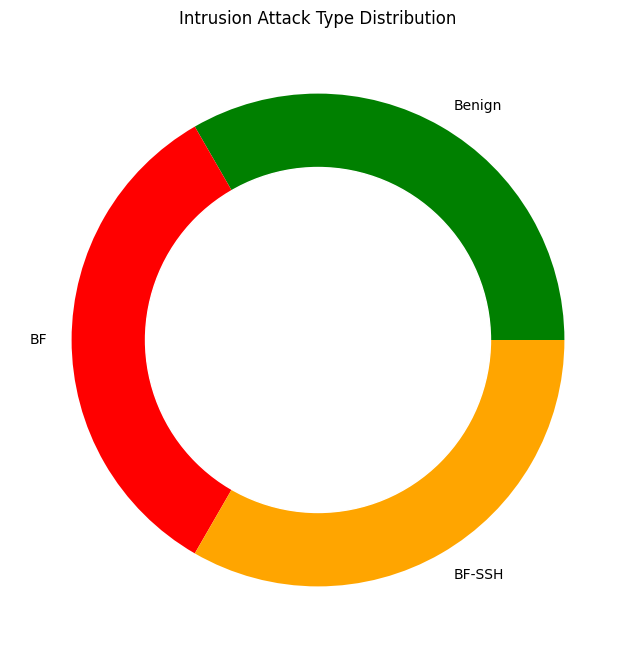

In [ ]:
# viewing the distribution of intrusion attacks in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Benign', 'BF', 'BF-SSH'], colors=['green', 'red', 'orange'])
p = plt.gcf()
p.gca().add_artist(circle)


### Making X & Y Variables (CNN)

In [ ]:
test_dataset = train_dataset.sample(frac=0.1)

target_train = train_dataset['Label']
target_test = test_dataset['Label']

# Inspecting Values in each
target_train.unique(), target_test.unique()

(array([0, 1, 2]), array([1, 0, 2]))

In [ ]:
y_train = to_categorical(target_train, num_classes=3)
y_test = to_categorical(target_test, num_classes=3)

### Data Splicing

This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of 80-20, i.e., 80% data to be used for training & 20% to be used for testing purpose.

In [ ]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)

In [ ]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[2.10000e+01, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.10000e+01, 1.80000e+01, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.10000e+01, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.30000e+01, 7.75820e+04, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 4.22007e+05, 2.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20000e+01, 7.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
# X shapes
print(X_train.shape)
print(X_test.shape)

# y shapes
print(y_train.shape)
print(y_test.shape)

(60000, 72)
(6000, 72)
(60000, 3)
(6000, 3)


In [ ]:
# reshape the data for CNN
CX_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
CX_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
CX_train.shape, CX_test.shape

((60000, 72, 1), (6000, 72, 1))

Shaping for Other Models

# RNN (LSTM Model)

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 73, 128)           66560     
                                                                 
 dropout_2 (Dropout)         (None, 73, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Reshape the data for LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=600, validation_data=(X_test, y_test))

Epoch 1/3
1396/1396 [==============================] - 1787s 1s/step - loss: -6.8128 - accuracy: 0.7929 - val_loss: -12.4166 - val_accuracy: 0.8198
Epoch 2/3
1396/1396 [==============================] - 1707s 1s/step - loss: -21.2964 - accuracy: 0.8154 - val_loss: -33.4463 - val_accuracy: 0.8192
Epoch 3/3
1396/1396 [==============================] - 1777s 1s/step - loss: -41.2299 - accuracy: 0.8148 - val_loss: -50.5283 - val_accuracy: 0.8198


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

6540/6540 [==============================] - 390s 59ms/step


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on test data
#y_pred = predict_classes(model.predict(X_test))

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.8198365669502055
Precision: 0.8198365669502055
Recall: 0.8198365669502055
F1 Score: 0.8198365669502055


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[132854    107      0]
 [     5  38705      0]
 [    60  37529      0]]


# CNN (1D, Convolutional Neural Network Model)

In [ ]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 72, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 72, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 36, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 36, 64)           256       
 hNormalization)                                                 
                                                        

In [ ]:
# Logging data
logger = CSVLogger('logs.csv', append=True)
his = model.fit(CX_train, y_train, epochs=30, batch_size=32,
          validation_data=(CX_test, y_test), callbacks=[logger])

Epoch 1/30
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1338 - accuracy: 0.9542 - val_loss: 0.5526 - val_accuracy: 0.7755
Epoch 2/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0880 - accuracy: 0.9713 - val_loss: 0.6251 - val_accuracy: 0.7773
Epoch 3/30
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0773 - accuracy: 0.9744 - val_loss: 0.4812 - val_accuracy: 0.9285
Epoch 4/30
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0809 - accuracy: 0.9739 - val_loss: 0.4552 - val_accuracy: 0.9273
Epoch 5/30
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0753 - accuracy: 0.9755 - val_loss: 0.8538 - val_accuracy: 0.7927
Epoch 6/30
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0720 - accuracy: 0.9769 - val_loss: 1.0441 - val_accuracy: 0.5295
Epoch 7/30
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0691 - accuracy: 0.9779 - val_loss: 0.8542 -

### Visualization of Results (CNN)

In [ ]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

InvalidArgumentError: ignored

In [ ]:
target_names = ['class1', 'class2', 'class3']
y_pred = model.predict(X_test)

188/188 [==============================] - 2s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Convert the one-hot encoded y_test and y_pred to class labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
confusion = confusion_matrix(y_test_labels, y_pred_labels)

# Print the metrics
print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:\n', confusion)


Accuracy: 0.6553333333333333
F1 score: 0.545399342850657
Precision: 0.49321475336616805
Recall: 0.6553333333333333
Confusion matrix:
 [[1937    0   43]
 [   0    0 2024]
 [   1    0 1995]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# check history of model
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

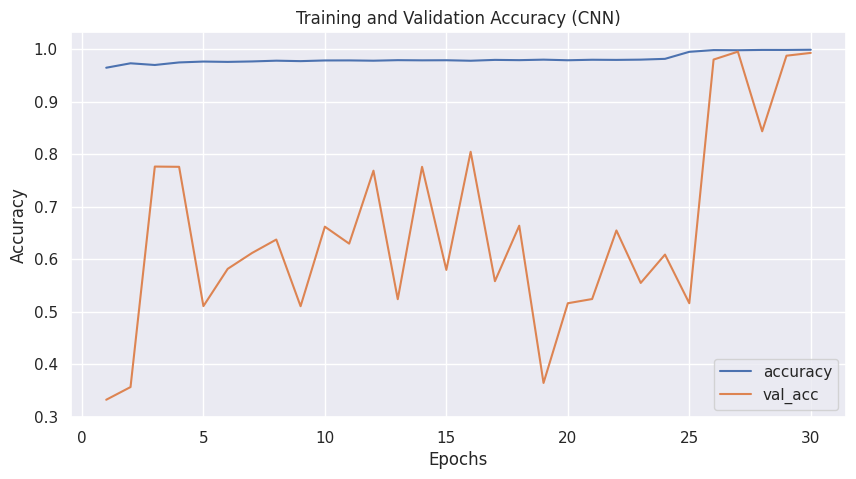

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

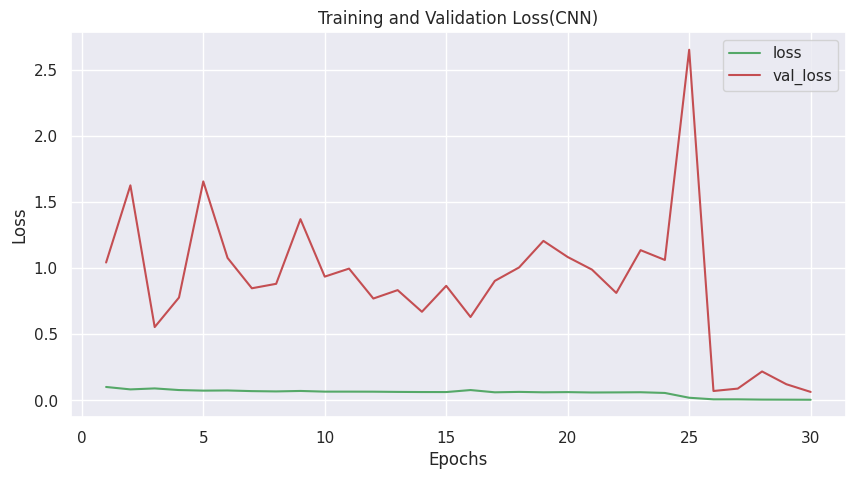

In [ ]:
# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

Conclusion after CNN Training

After training our deep CNN model on training data and validating it on validation data, it can be interpreted that:

* Model was trained on 50 epochs and then on 30 epochs
    
* CNN performed exceptionally well on training data and the accuracy was 99%
    
* Model accuracy was down to 83.55% on valiadtion data after 50 iterations, and gave a good accuracy of 92% after 30 iterations. Thus, it can be interpreted that optimal number of iterations on which this model can perform are 30.


# Machine Learning Models (On Non-Seq)

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
###### - Testing on Validation Data - ######

# Predict the class of the test set
test_pred = dt.predict(X_test)

# Set the threshold value
threshold = 0.5

# Convert predicted probabilities to binary labels based on the threshold
test_pred_binary = (test_pred >= threshold).astype(int)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, test_pred_binary)
print(f"Accuracy score: {accuracy:.3f}")

Accuracy score: 0.820


In [ ]:
print(classification_report(y_test,test_pred_binary))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    132961
           1       0.51      1.00      0.67     38710
           2       0.00      0.00      0.00     37589

    accuracy                           0.82    209260
   macro avg       0.50      0.67      0.56    209260
weighted avg       0.73      0.82      0.76    209260



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Naive Bayes

In [ ]:
# create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# fit the model to the training data
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
###### - Testing on Test Data - ######

# Predict the class of the test set
test_pred = nb_model.predict(X_test)

# Set the threshold value
threshold = 0.5

# Convert predicted probabilities to binary labels based on the threshold
test_pred_binary = (test_pred >= threshold).astype(int)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, test_pred_binary)
print(f"Accuracy score: {accuracy:.3f}")

Accuracy score: 0.406


In [ ]:
print(classification_report(y_test,test_pred_binary))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      0.35      0.52    132961
           1       0.24      1.00      0.38     38710
           2       0.00      0.00      0.00     37589

    accuracy                           0.41    209260
   macro avg       0.41      0.45      0.30    209260
weighted avg       0.68      0.41      0.40    209260



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Logisitic Regression

In [ ]:
# Creating a logistic regression object
log_reg = LogisticRegression(max_iter=10000)

# Training the model using the training data
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=10000)

In [ ]:
###### - Testing on Test Data - ######

# Predict the class of the test set
test_pred = log_reg.predict(X_test)

# Set the threshold value
threshold = 0.5

# Convert predicted probabilities to binary labels based on the threshold
test_pred_binary = (test_pred >= threshold).astype(int)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, test_pred_binary)
print(f"Accuracy score: {accuracy:.3f}")

Accuracy score: 0.554


In [ ]:
print(classification_report(y_test,test_pred_binary))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.80      0.58      0.67    132961
           1       0.34      1.00      0.51     38710
           2       0.00      0.00      0.00     37589

    accuracy                           0.55    209260
   macro avg       0.38      0.53      0.39    209260
weighted avg       0.57      0.55      0.52    209260



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



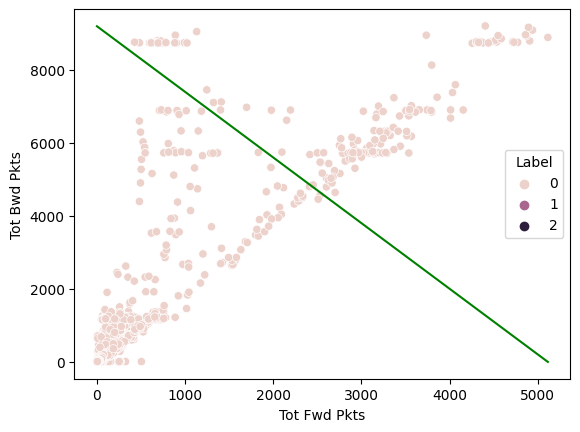

In [ ]:
sns.scatterplot(data = other_df, x = "Tot Fwd Pkts",y="Tot Bwd Pkts", hue = "Label" )

xline = np.linspace(other_df["Tot Fwd Pkts"].min(), other_df["Tot Fwd Pkts"].max(), num = 300)
yline = np.linspace(other_df["Tot Bwd Pkts"].max(), other_df["Tot Bwd Pkts"].min(), num = 300)
_=plt.plot(xline,yline-9, color = "green")